In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the ratings data
ratings = pd.read_csv('raw_ratings.csv', delimiter=';', parse_dates=['timestamp'], date_parser=lambda x: pd.to_datetime(int(x), unit='s'))

# # Load the movies data
movies = pd.read_csv('raw_movies.csv', delimiter=';')

# # Merge the data
data = pd.merge(ratings, movies, on='iid')

# # Set timestamp as index
data.set_index('timestamp', inplace=True)

# # List of all genres
genres = ['Adventure', 'Fantasy', 'Children', 'Animation', 'Comedy', 'Romance', 'Drama', 'Thriller', 'Action', 'Crime', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir']


/tmp/ipykernel_225249/3115875022.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ratings = pd.read_csv('raw_ratings.csv', delimiter=';', parse_dates=['timestamp'], date_parser=lambda x: pd.to_datetime(int(x), unit='s'))


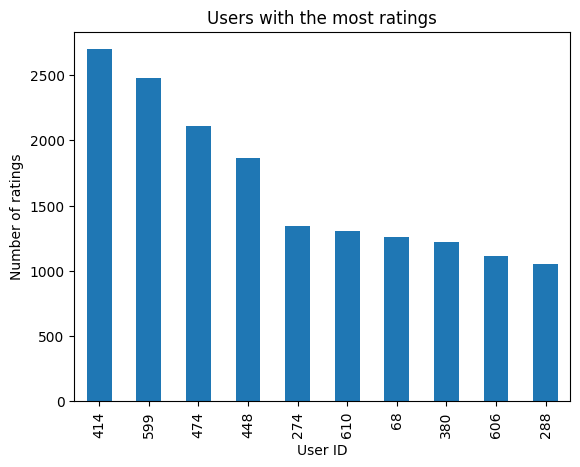

In [3]:
# find the users who have rated the most movies
user_counts = data['uid'].value_counts()
user_counts = user_counts.sort_values(ascending=False)
user_counts = user_counts[:10]
user_counts.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of ratings')
plt.title('Users with the most ratings')
plt.show()

In [22]:
user_counts

uid
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: count, dtype: int64

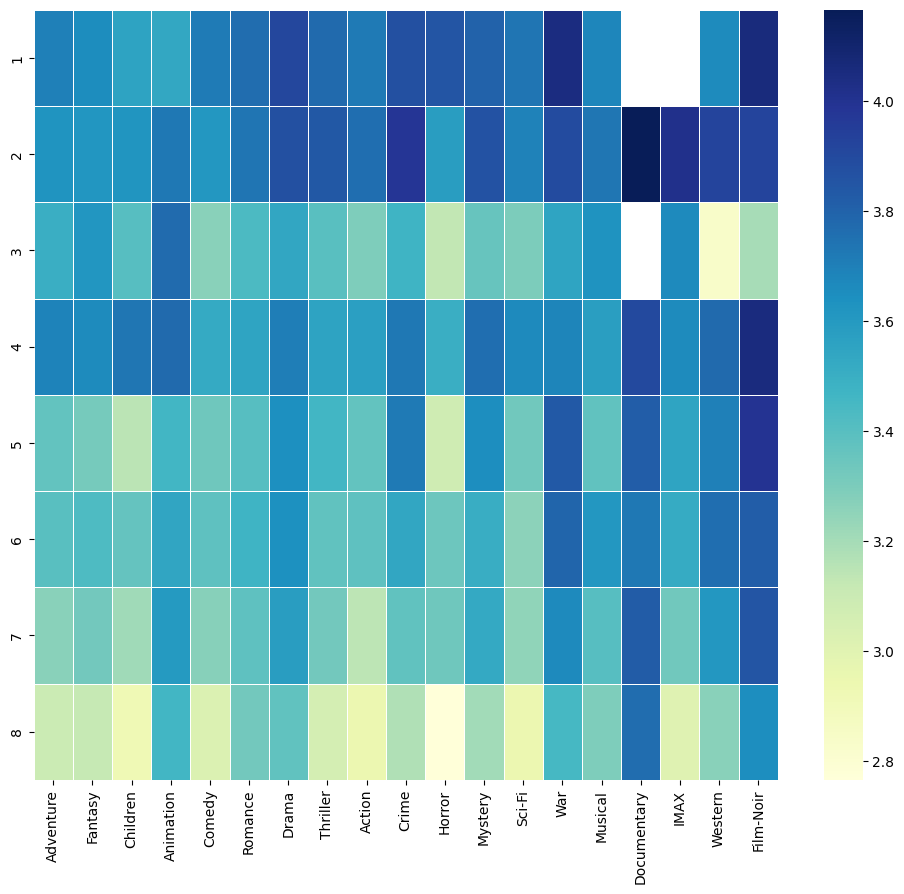

In [33]:
import seaborn as sns

# Create an empty DataFrame for storing average ratings per year for each genre
heatmap_data = pd.DataFrame()

# Iterate over the genres
for genre in genres:
    # Group data into 8 chunks of equal size and calculate average rating
    chunk_size = len(data) // 8
    chunks = [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

    # break

    # Filter data by genre
    chunks = [chunk[chunk[genre] == True] for chunk in chunks]

    # Filter by user
    user = None
    if user:
        chunks = [chunk[chunk['uid'] == user] for chunk in chunks]

    chunks = [chunk['rating'] for chunk in chunks]

    
    avg_ratings = [chunk.mean() for chunk in chunks][:-1]

    # Store the results in the DataFrame
    heatmap_data[genre] = avg_ratings

# Transpose the DataFrame so that genres are rows and years are columns
# heatmap_data = heatmap_data.transpose()

# start index from 1
heatmap_data.index = [i+1 for i in range(len(heatmap_data.index))]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)

plt.show()

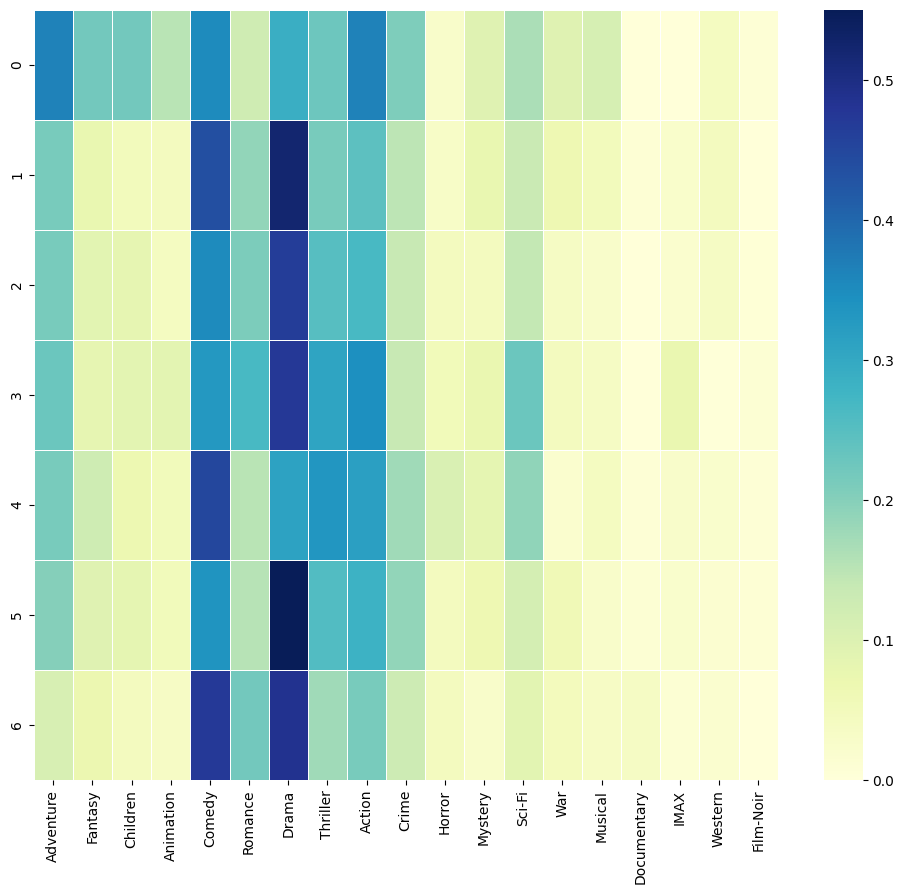

In [31]:
import seaborn as sns

# Create an empty DataFrame for storing average ratings per year for each genre
heatmap_data = pd.DataFrame()

# Iterate over the genres
for genre in genres:
    # Group data into 8 chunks of equal size and calculate average rating
    chunk_size = len(data) // 8
    chunks = [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)][:-1]

    # Filter by user
    user = 414
    if user:
        chunks = [chunk[chunk['uid'] == user] for chunk in chunks]

    lens = [len(chunk) for chunk in chunks]
    # replace 0 with inf to avoid division by 0
    lens = [x if x != 0 else float('inf') for x in lens]

    # Filter data by genre
    chunks = [chunk[chunk[genre] == True] for chunk in chunks]

    # Calculate the proportion of ratings for this genre
    prop_ratings = [len(chunk) / lens[i] for i, chunk in enumerate(chunks)][:-1]

    # Store the results in the DataFrame
    heatmap_data[genre] = prop_ratings

# Transpose the DataFrame so that genres are rows and years are columns
# heatmap_data = heatmap_data.transpose()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)

plt.show()

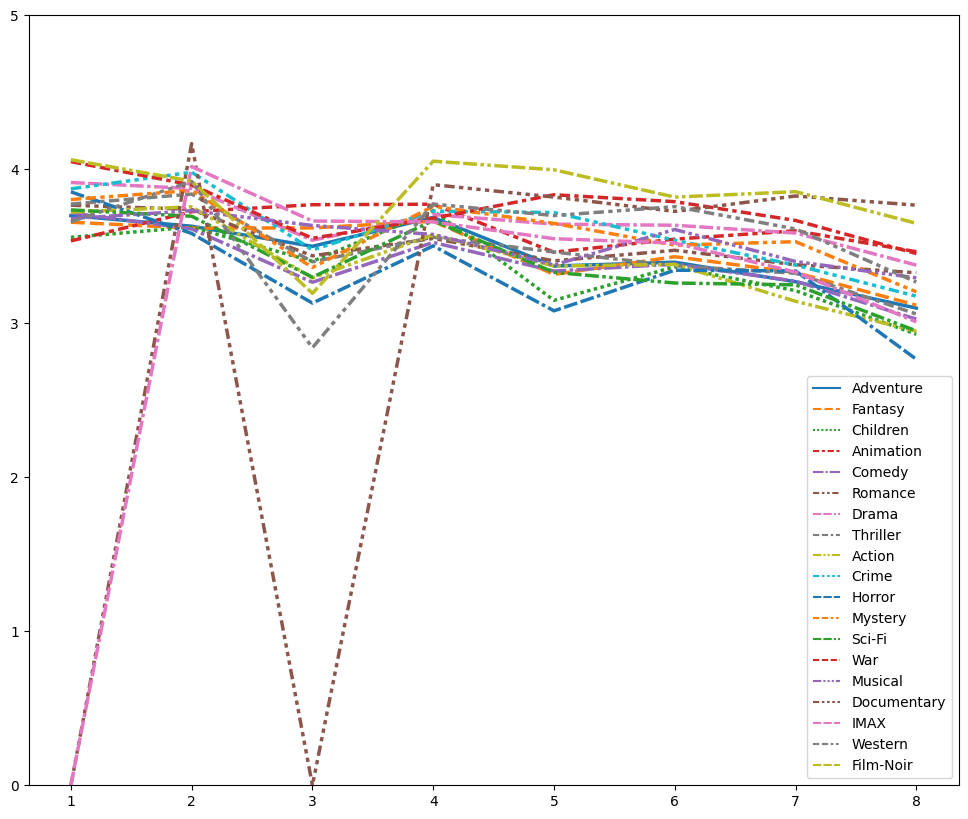

In [34]:
# redo it as a line plot
# treat absence of data as 0
heatmap_data = heatmap_data.fillna(0)
plt.figure(figsize=(12, 10))
sns.lineplot(data=heatmap_data, palette="tab10", linewidth=2.5)
plt.legend(loc='lower right')
plt.ylim(0, 5)
plt.show()
# legend bottom right


In [37]:
heatmap_data.sum(axis=1)


0    3.033957
1    2.774913
2    2.758251
3    3.061568
4    2.856077
5    2.659870
6    2.379165
7    2.252698
dtype: float64